In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import utils
import random
import numpy as np
# Charger les données
train_data, labels = utils.load_data(convert_features_n=False)

In [2]:
train_data.columns

Index([           (0, 'ask'),           (0, 'ask1'),       (0, 'ask_size'),
            (0, 'ask_size1'),            (0, 'bid'),           (0, 'bid1'),
             (0, 'bid_size'),      (0, 'bid_size1'),          (0, 'price'),
                  (0, 'qty'),      (0, 'source_id'),            (0, 'tod'),
       (0, 'ts_last_update'),            (1, 'ask'),           (1, 'ask1'),
             (1, 'ask_size'),      (1, 'ask_size1'),            (1, 'bid'),
                 (1, 'bid1'),       (1, 'bid_size'),      (1, 'bid_size1'),
       (1, 'ts_last_update'),            (2, 'ask'),           (2, 'ask1'),
             (2, 'ask_size'),      (2, 'ask_size1'),            (2, 'bid'),
                 (2, 'bid1'),       (2, 'bid_size'),      (2, 'bid_size1'),
       (2, 'ts_last_update'),            (3, 'ask'),           (3, 'ask1'),
             (3, 'ask_size'),      (3, 'ask_size1'),            (3, 'bid'),
                 (3, 'bid1'),       (3, 'bid_size'),      (3, 'bid_size1'),
       (3, '

In [3]:
train_data.head()

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)",...,"(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,ID
0,4.5,562.5,0.002330,0.093197,-25.5,-545.5,0.046598,0.046598,-0.5,0.037279,...,0.004660,4,38930876675,-3.5,0.046598,2,38930876000,387,238,0
1,2.5,14.5,0.001314,0.013139,-10.5,-406.5,0.013139,0.026278,-0.5,0.013139,...,0.013139,2,46336088000,1.5,0.013139,4,46336087875,437,22,1
2,5.0,210.0,0.010792,0.010792,-95.0,-285.0,0.032376,0.021584,-3.0,0.010253,...,0.050615,2,57584792000,0.0,0.010792,2,57583312000,7,255,2
3,0.5,1.5,0.006943,0.006943,-2.5,-3.5,0.006943,0.013886,-0.5,0.000069,...,0.013886,4,49549010300,0.5,0.006943,1,49549010200,48,64,3
4,15.0,442.0,0.035689,0.071378,-391.0,-397.0,0.035689,0.035689,3.0,0.035689,...,0.035689,2,42452055000,-8.0,0.035689,3,42451072650,52,231,4


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 959506 entries, 0 to 959505
Data columns (total 97 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   (0, ask)             959487 non-null  float32
 1   (0, ask1)            959484 non-null  float32
 2   (0, ask_size)        959487 non-null  float32
 3   (0, ask_size1)       959484 non-null  float32
 4   (0, bid)             959488 non-null  float32
 5   (0, bid1)            959486 non-null  float32
 6   (0, bid_size)        959488 non-null  float32
 7   (0, bid_size1)       959486 non-null  float32
 8   (0, price)           959506 non-null  float32
 9   (0, qty)             959506 non-null  float32
 10  (0, source_id)       959506 non-null  int32  
 11  (0, tod)             959506 non-null  int64  
 12  (0, ts_last_update)  959506 non-null  int64  
 13  (1, ask)             959500 non-null  float32
 14  (1, ask1)            959492 non-null  float32
 15  (1, ask_size)        9

In [5]:
train_data.describe()

,"(0, ask)","(0, ask1)","(0, ask_size)","(0, ask_size1)","(0, bid)","(0, bid1)","(0, bid_size)","(0, bid_size1)","(0, price)","(0, qty)",...,"(8, qty)","(8, source_id)","(8, tod)","(9, price)","(9, qty)","(9, source_id)","(9, tod)",stock_id,day_id,ID
count,959487.000000,959484.000000,959487.000000,959484.000000,959488.000000,959486.000000,959488.000000,959486.000000,959506.000000,9.595060e+05,...,9.595060e+05,959506.000000,9.595060e+05,959506.000000,9.595060e+05,959506.000000,9.595060e+05,959506.000000,959506.000000,959506.000000
mean,79.347153,313.156250,0.028768,0.036867,-89.951057,-319.875854,0.029108,0.036888,5.054900,1.729041e-02,...,1.805408e-02,2.959103,4.729393e+10,50.915878,1.803792e-02,2.958547,4.729078e+10,246.057638,122.249329,479752.500000
std,393.277008,634.442505,0.021420,0.029134,420.279327,646.534607,0.022305,0.028850,2250.730713,1.991885e-02,...,2.272931e-02,1.362509,7.658573e+09,7139.249512,2.238285e-02,1.363040,7.659177e+09,146.808244,76.072543,276985.668032
min,-0.500000,0.015000,0.000002,0.000008,-10142.000000,-13060.000000,0.000003,0.000003,-25592.500000,6.127000e-07,...,6.127000e-07,0.000000,3.420001e+10,-57640.000000,6.127000e-07,0.000000,3.420000e+10,0.000000,2.000000,0.000000
25%,2.500000,7.500000,0.013923,0.016664,-18.000000,-420.000000,0.013860,0.016748,-0.500000,3.556911e-03,...,4.194922e-03,2.000000,4.024255e+10,-1.000000,4.191675e-03,2.000000,4.023918e+10,118.000000,54.000000,239876.250000
50%,7.500000,160.500000,0.027071,0.032373,-7.500000,-169.000000,0.027159,0.032468,0.000000,1.265823e-02,...,1.362398e-02,3.000000,4.756172e+10,0.000000,1.360914e-02,3.000000,4.755761e+10,242.000000,123.000000,479752.500000
75%,17.000000,412.000000,0.038550,0.050213,-2.500000,-7.500000,0.038841,0.050378,0.500000,2.751629e-02,...,2.794077e-02,4.000000,5.495490e+10,1.000000,2.794858e-02,4.000000,5.495230e+10,374.000000,189.000000,719628.750000
max,10177.000000,13273.500000,0.915631,0.938088,0.500000,-0.015000,0.847400,0.880432,996495.500000,3.896014e+00,...,3.075269e+00,5.000000,5.759998e+10,999537.000000,4.168245e+00,5.000000,5.759998e+10,499.000000,255.000000,959505.000000


In [6]:
# sns.heatmap(train_data.isna(), cbar=False)

In [7]:
missing = train_data.isna().sum()
print(missing[missing > 0])

(0, ask)                  19
(0, ask1)                 22
(0, ask_size)             19
(0, ask_size1)            22
(0, bid)                  18
(0, bid1)                 20
(0, bid_size)             18
(0, bid_size1)            20
(1, ask)                   6
(1, ask1)                 14
(1, ask_size)              6
(1, ask_size1)            14
(1, bid)                  13
(1, bid1)                 17
(1, bid_size)             13
(1, bid_size1)            17
(2, ask)                 551
(2, ask1)              15579
(2, ask_size)            551
(2, ask_size1)         15579
(2, bid)                 562
(2, bid1)              18548
(2, bid_size)            562
(2, bid_size1)         18548
(2, ts_last_update)      510
(3, ask)                  18
(3, ask1)                 19
(3, ask_size)             18
(3, ask_size1)            19
(3, bid)                  18
(3, bid1)                 19
(3, bid_size)             18
(3, bid_size1)            19
dtype: int64


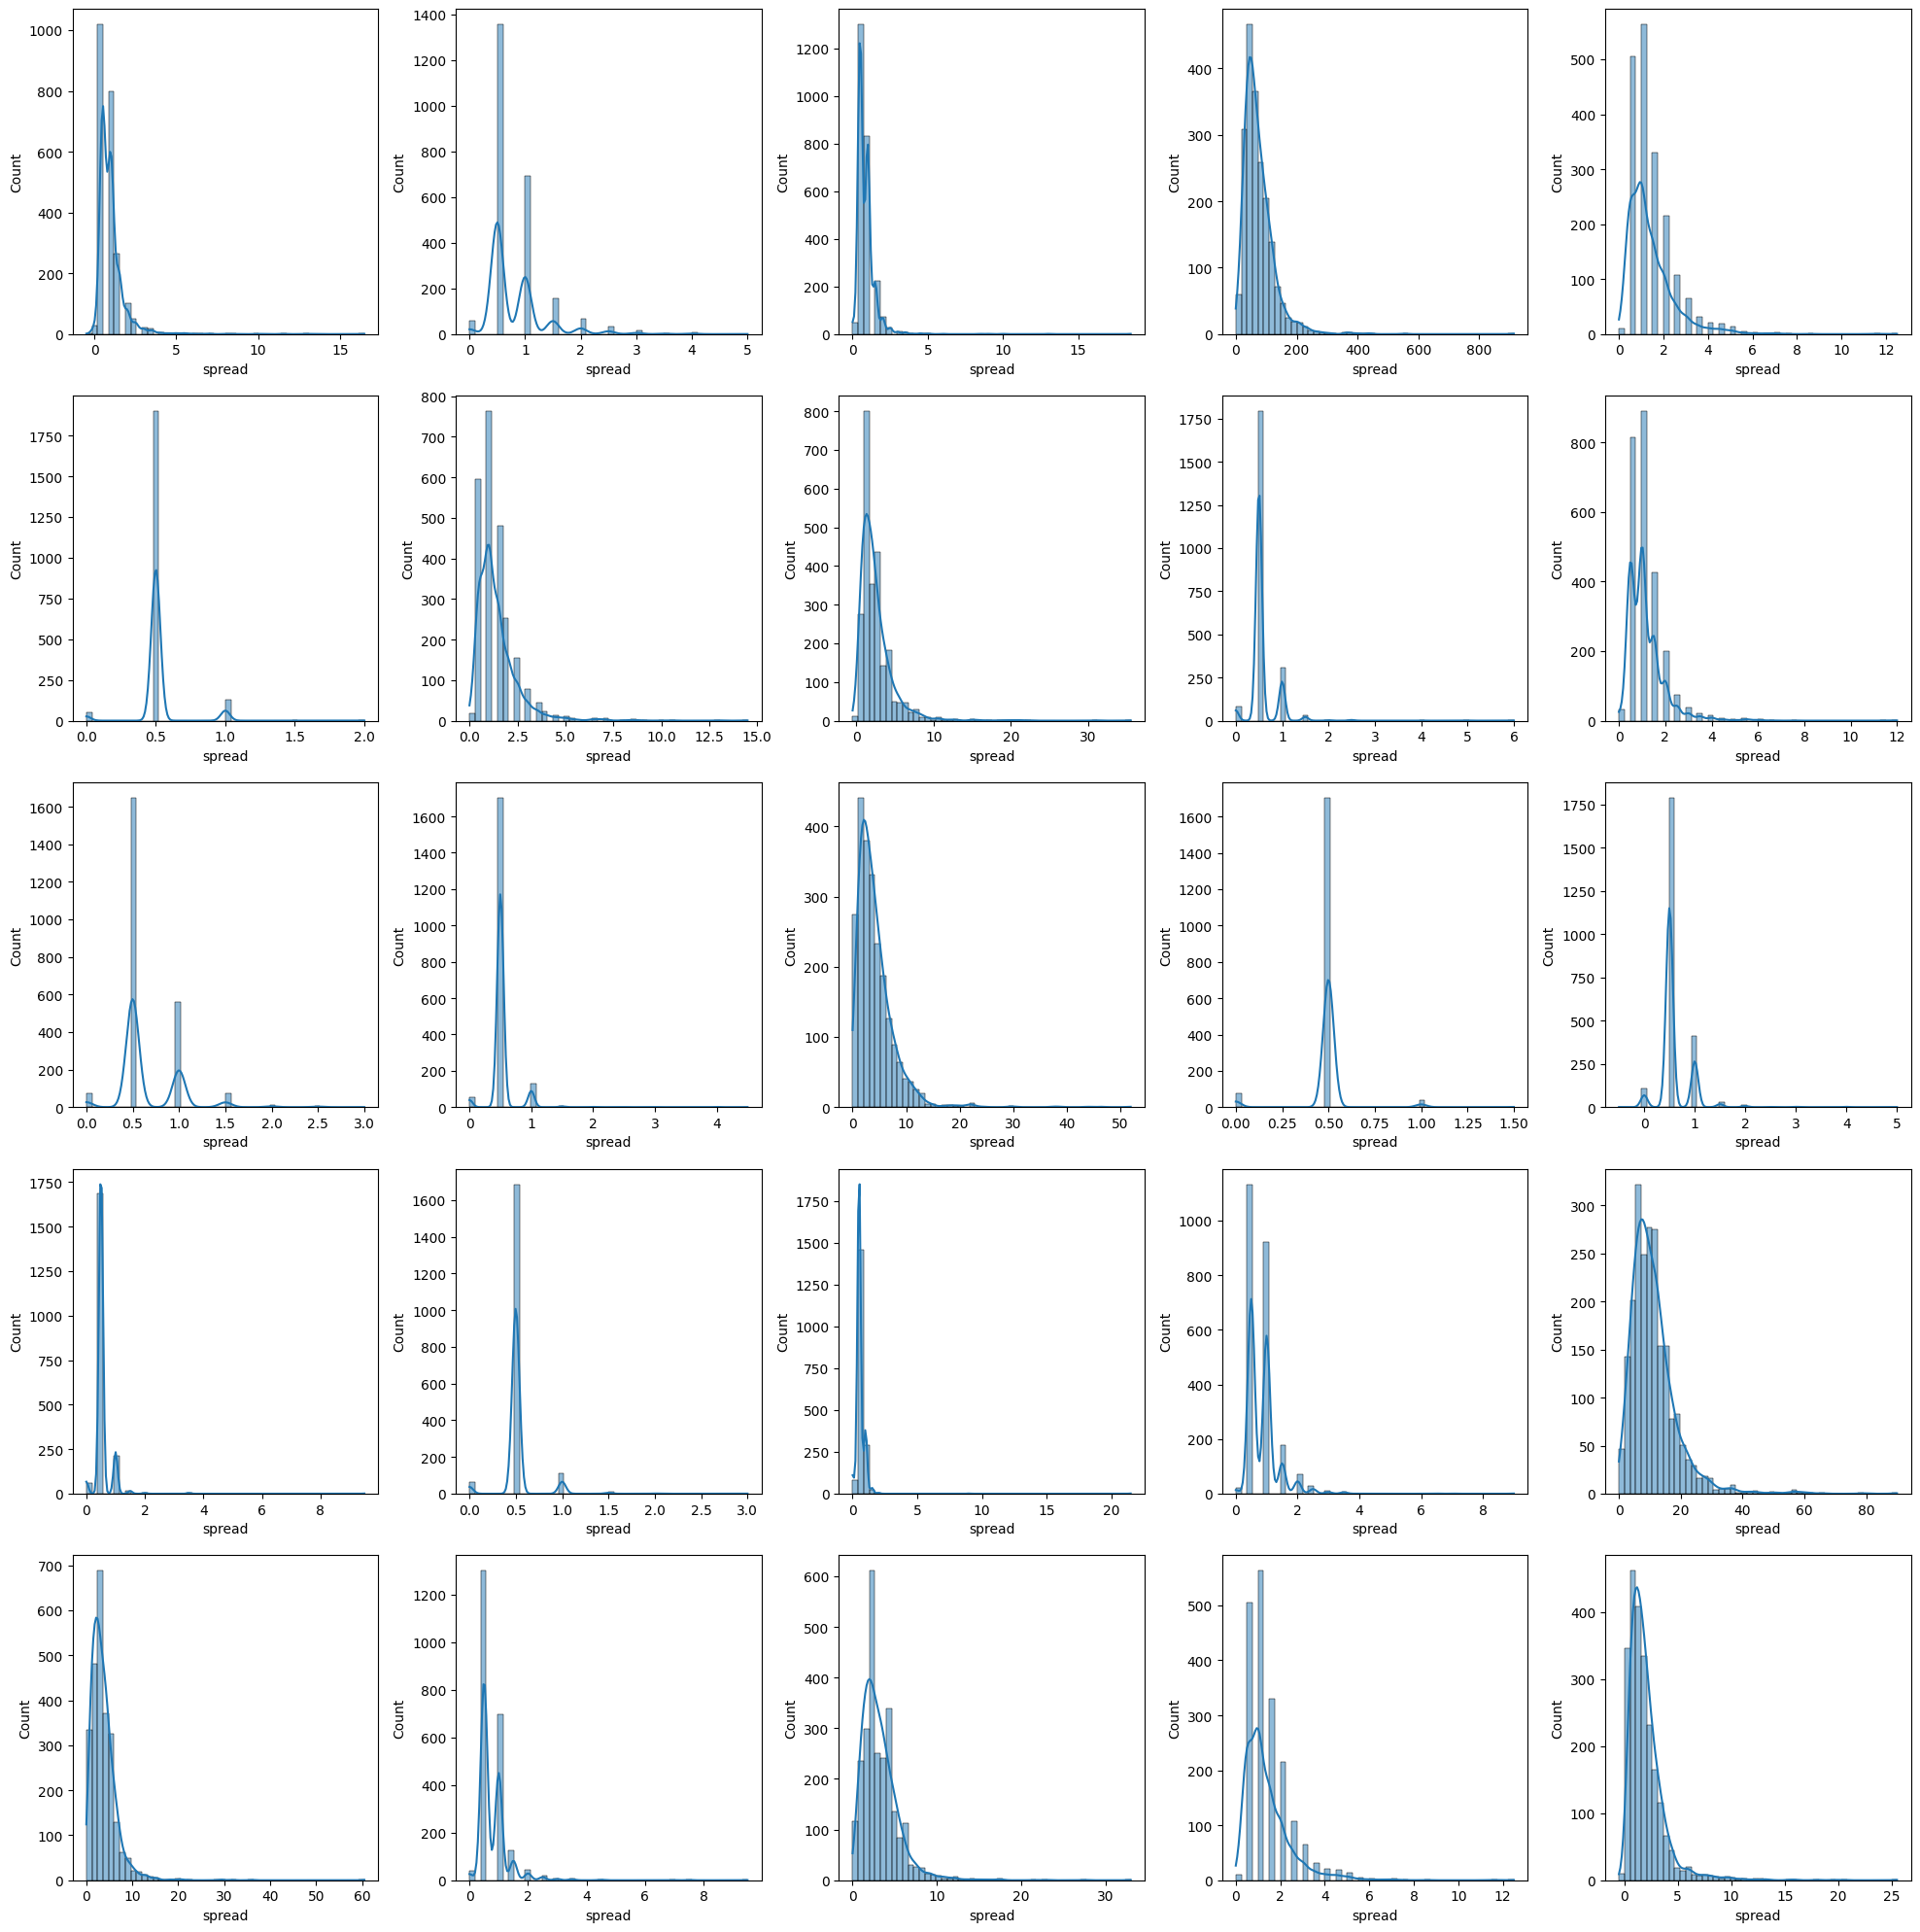

In [8]:
def plot_aggregate_spread_distribution(data, n=25):
    data_agg = data.copy()
    data_agg = utils.compute_best_spread(data_agg)
    
    n_stocks = data_agg['stock_id'].nunique()
    a = np.random.randint(0, n_stocks, n)
    
    unique_stock_ids = data_agg['stock_id'].unique()[a]
    num_plots = len(unique_stock_ids)
    num_cols = round(np.sqrt(n))
    num_rows = (num_plots // num_cols) + (num_plots % num_cols > 0)
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    axes = axes.flatten()
    
    for i, stock_id in enumerate(unique_stock_ids):
        stock_data = data_agg[data_agg['stock_id'] == stock_id]
        sns.histplot(stock_data['spread'], bins=50, ax=axes[i], kde=True)
    
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()
    
    
plot_aggregate_spread_distribution(train_data)

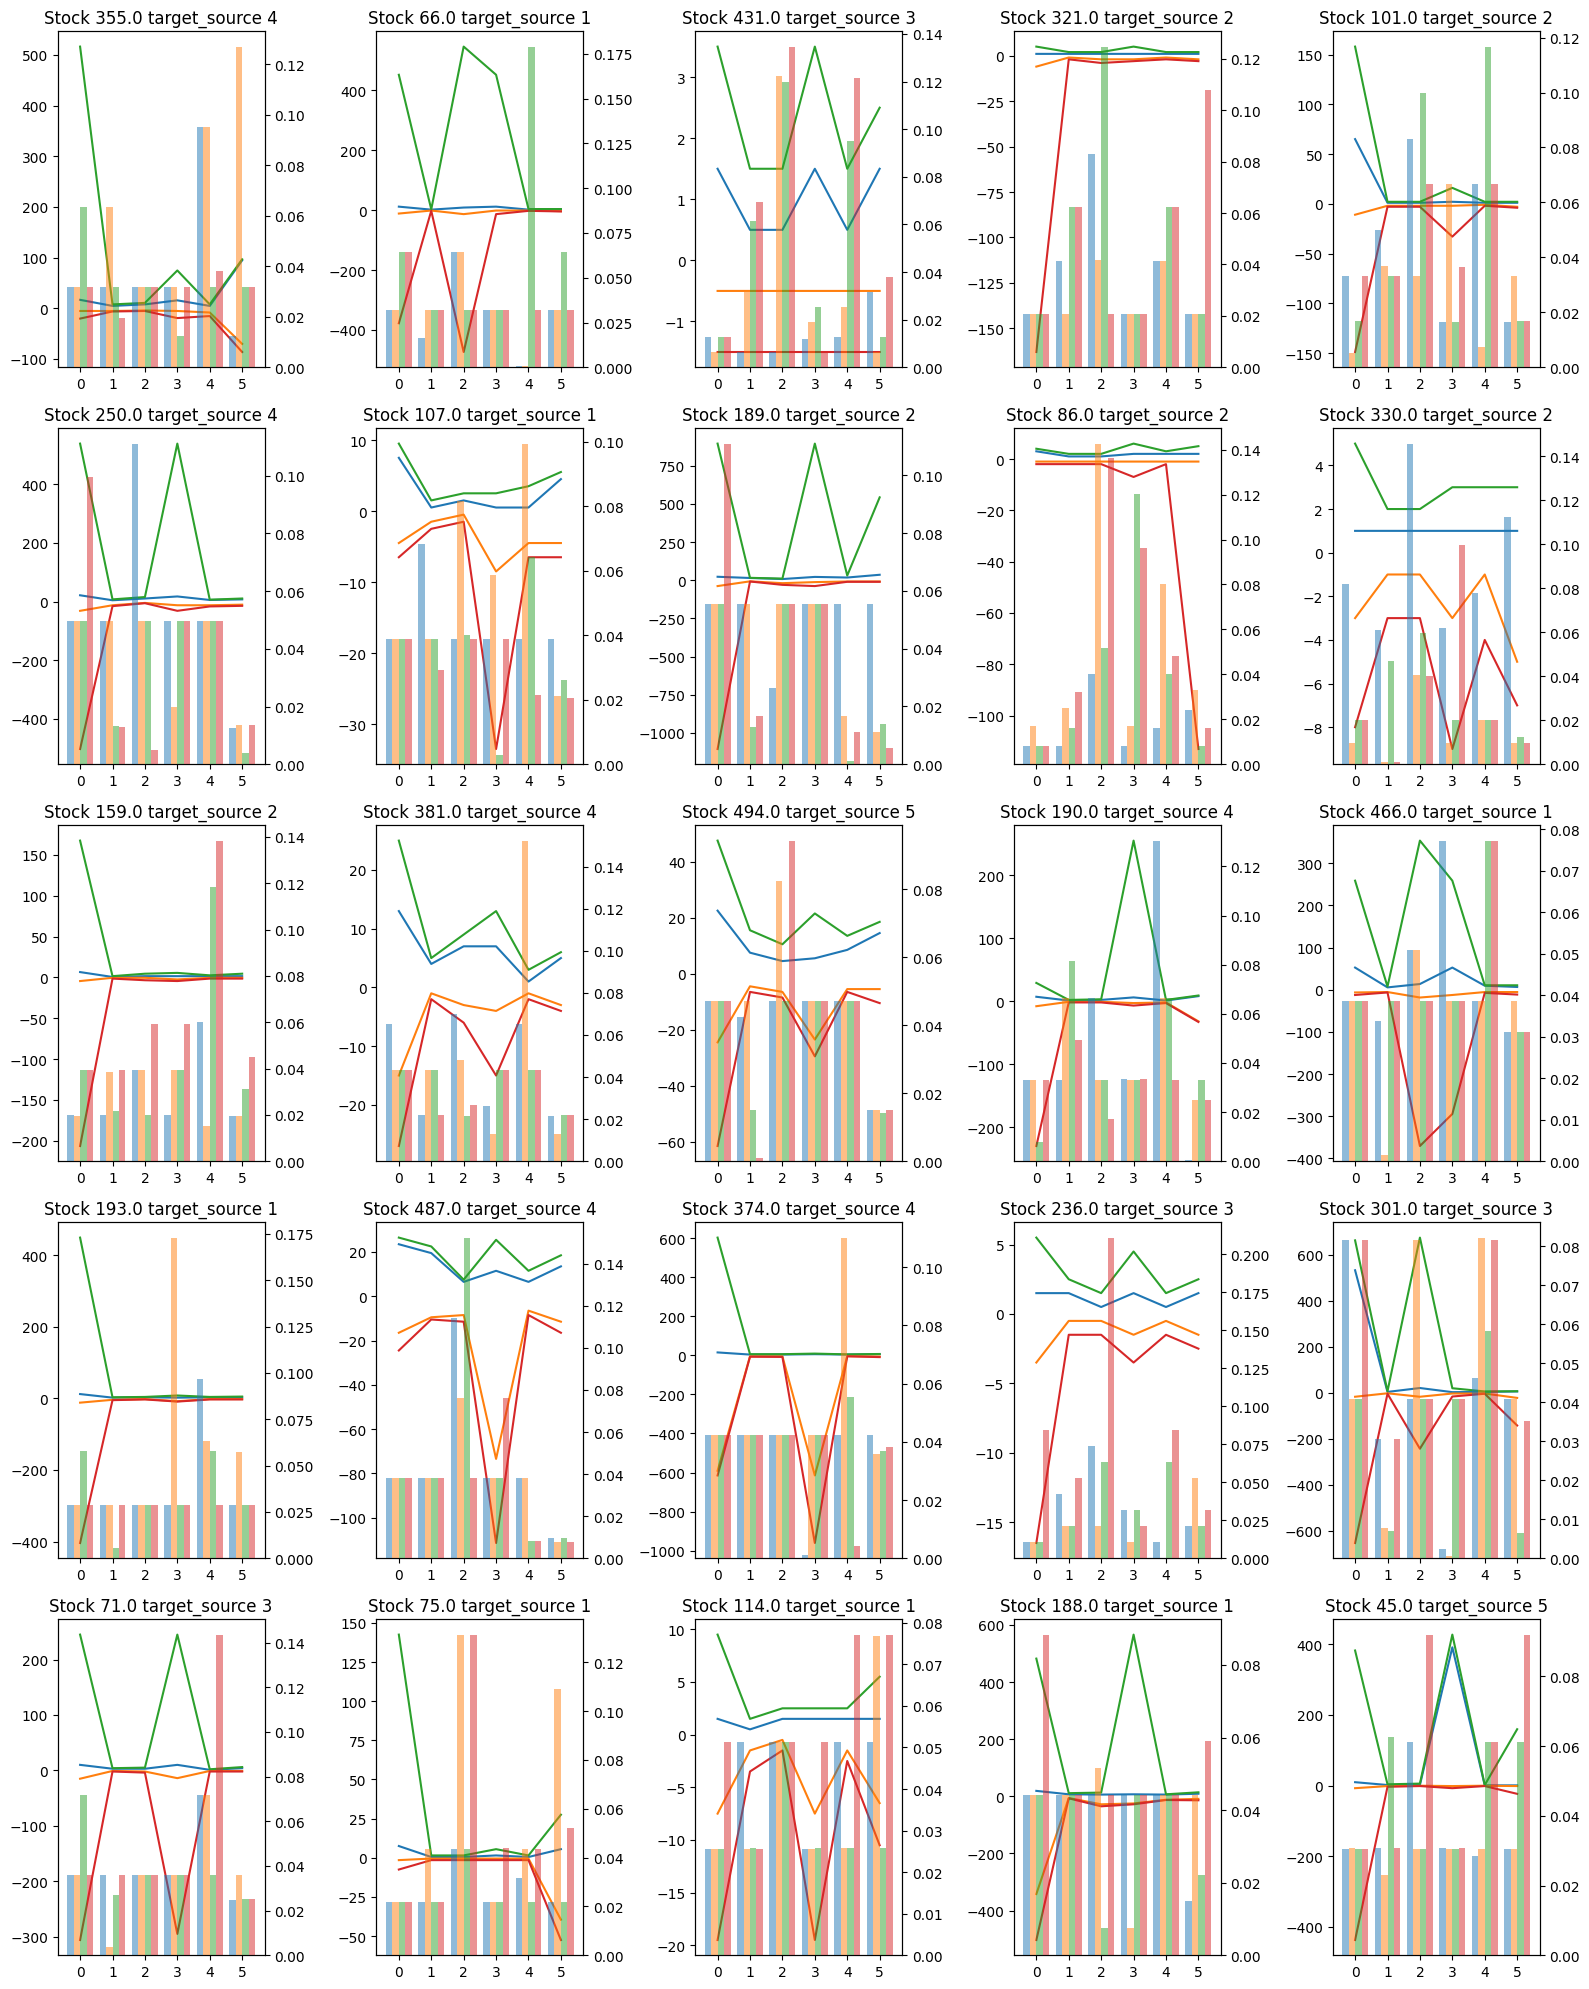

In [9]:
def visualize_all_order_books(data, labels, n_samples = 25, eta = 0.0001):
    np.random.seed(42)
    choice = np.random.randint(0, data.shape[0], n_samples)
    data = data.iloc[choice]
    labels = labels.iloc[choice]
    
    num_cols = 5
    num_rows = (n_samples // num_cols) + (n_samples % num_cols > 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
    axes = axes.flatten()
    
    for idx, (row_data,row_labels) in enumerate(zip(data.iterrows(), labels.iterrows())):
        row_data = row_data[1]
        # print(row_data[0], row_data[1])
        ask = [row_data[(i, "ask")] + eta*random.random() for i in range(6)]
        ask_1 = [row_data[(i, "ask1")]+ eta*random.random() for i in range(6)]
        bid = [row_data[(i, "bid")]+ eta*random.random() for i in range(6)]
        bid_1 = [row_data[(i, "bid1")]+ eta*random.random() for i in range(6)]
        
        ask_size = [row_data[(i, "ask_size")]+ eta*random.random() for i in range(6)]
        ask_size_1 = [row_data[(i, "ask_size1")]+ eta*random.random() for i in range(6)]
        bid_size = [row_data[(i, "bid_size")]+ eta*random.random() for i in range(6)]
        bid_size_1 = [row_data[(i, "bid_size1")]+ eta*random.random() for i in range(6)]
        
        ts_last_update = [row_data[(i, "ts_last_update")] for i in range(6)]
        
        
        ax = axes[idx]
        ax.set_title(f"Stock {row_data['stock_id']} target_source {row_labels[1]['source_id']}")
        
        ax.plot(ask, label="ask")
        ax.plot(bid, label="bid")
        ax.plot(ask_1, label="ask_1")
        ax.plot(bid_1, label="bid_1")
        
        ax2 = ax.twinx()
        x = np.arange(6)
        width = 0.2
        ax2.bar(x - width*1.5, ask_size, width, label="ask_size", alpha=0.5)
        ax2.bar(x - width*0.5, bid_size, width, label="bid_size", alpha=0.5)
        ax2.bar(x + width*0.5, ask_size_1, width, label="ask_size_1", alpha=0.5)
        ax2.bar(x + width*1.5, bid_size_1, width, label="bid_size_1", alpha=0.5)
        ax2.set_xticks(x)
        
        
    
    # Hide any unused subplots
    for j in range(idx + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

visualize_all_order_books(train_data, labels)


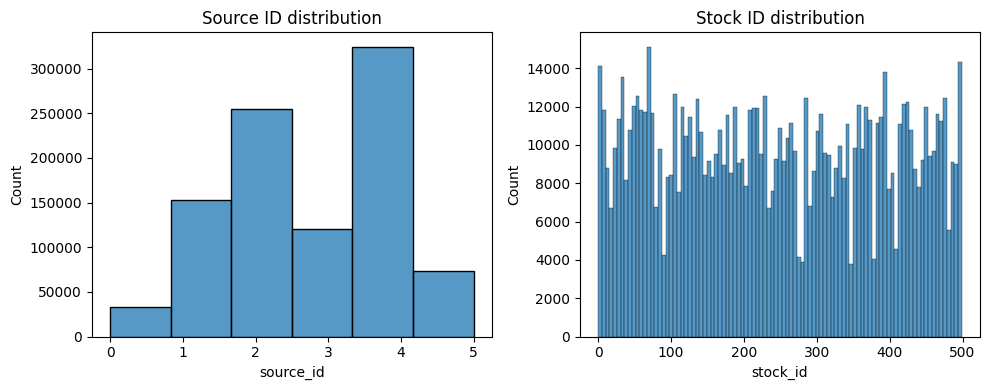

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(labels['source_id'], bins=6, ax=ax[0])
ax[0].set_title("Source ID distribution")

sns.histplot(train_data["stock_id"], ax=ax[1])
ax[1].set_title("Stock ID distribution")

plt.tight_layout()
plt.show()

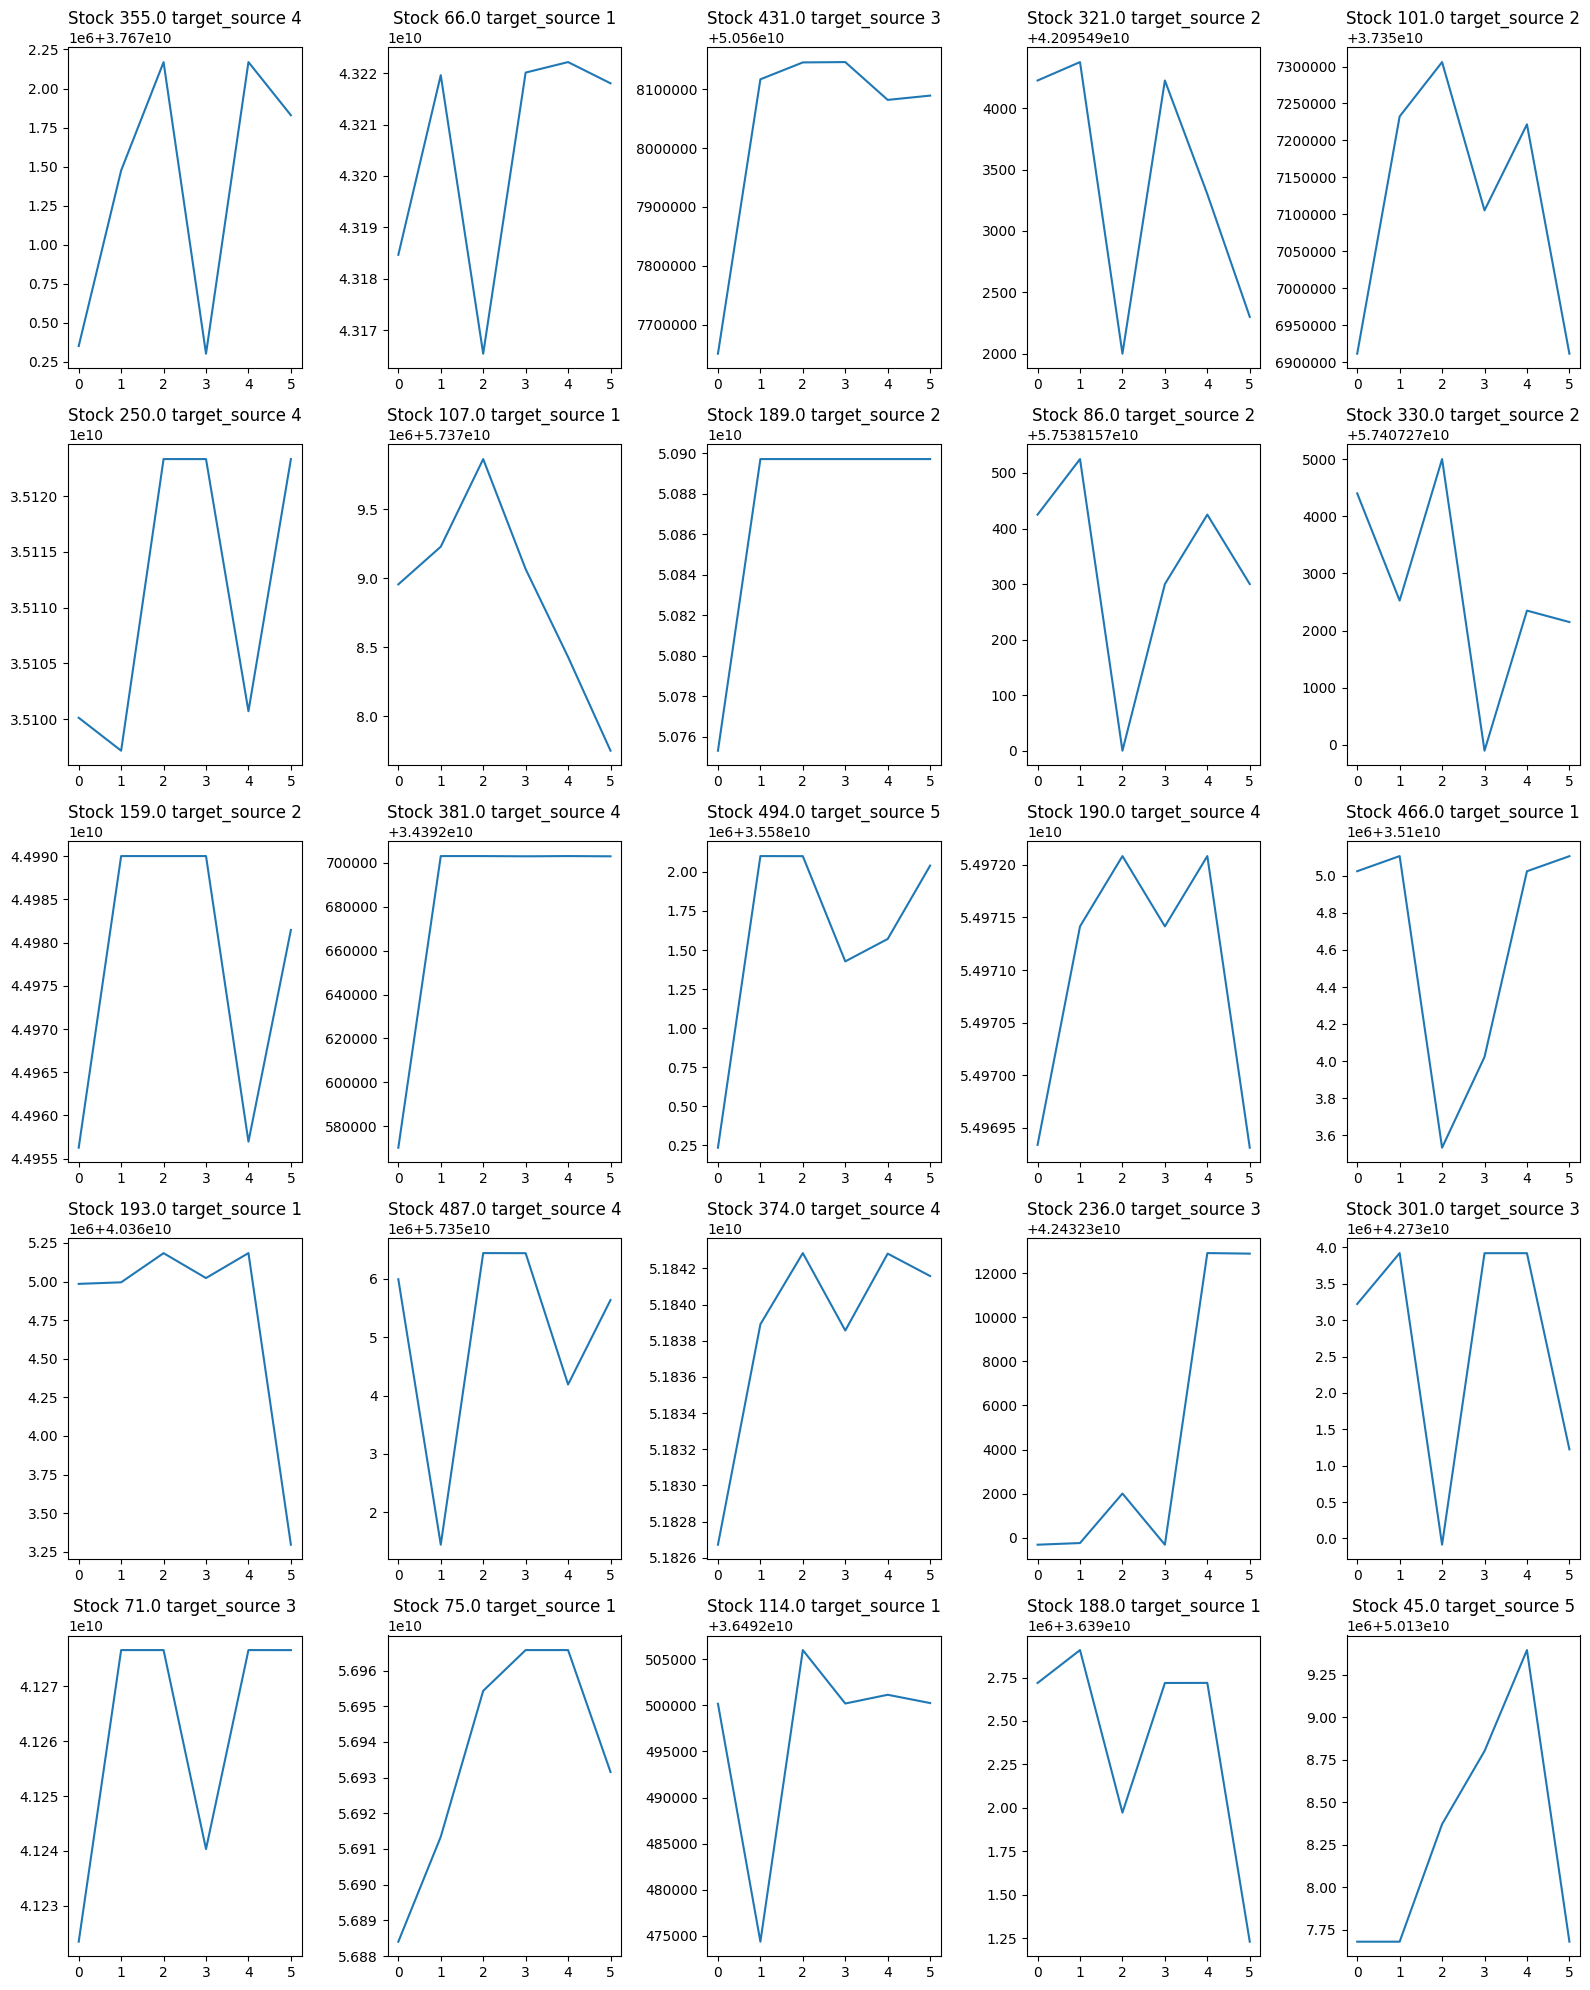

In [11]:
def plot_order_book_last_update(data, labels, n_samples = 25):
    np.random.seed(42)
    choice = np.random.randint(0, data.shape[0], n_samples)
    data = data.iloc[choice]
    labels = labels.iloc[choice]

    num_cols = 5
    num_rows = (n_samples // num_cols) + (n_samples % num_cols > 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
    axes = axes.flatten()
    
    for idx, (row_data, row_labels) in enumerate(zip(data.iterrows(), labels.iterrows())):
        row_data = row_data[1]
        row_labels = row_labels[1]
        
        ts_last_update = [row_data[(i, "ts_last_update")] for i in range(6)]
        
        ax = axes[idx]
        ax.plot(ts_last_update, label = "ts_last_update")
        ax.set_title(f"Stock {row_data['stock_id']} target_source {row_labels['source_id']}")
        ax.set_xticks(np.arange(6))
        
    plt.tight_layout()
    plt.show()
    
plot_order_book_last_update(train_data, labels)
    

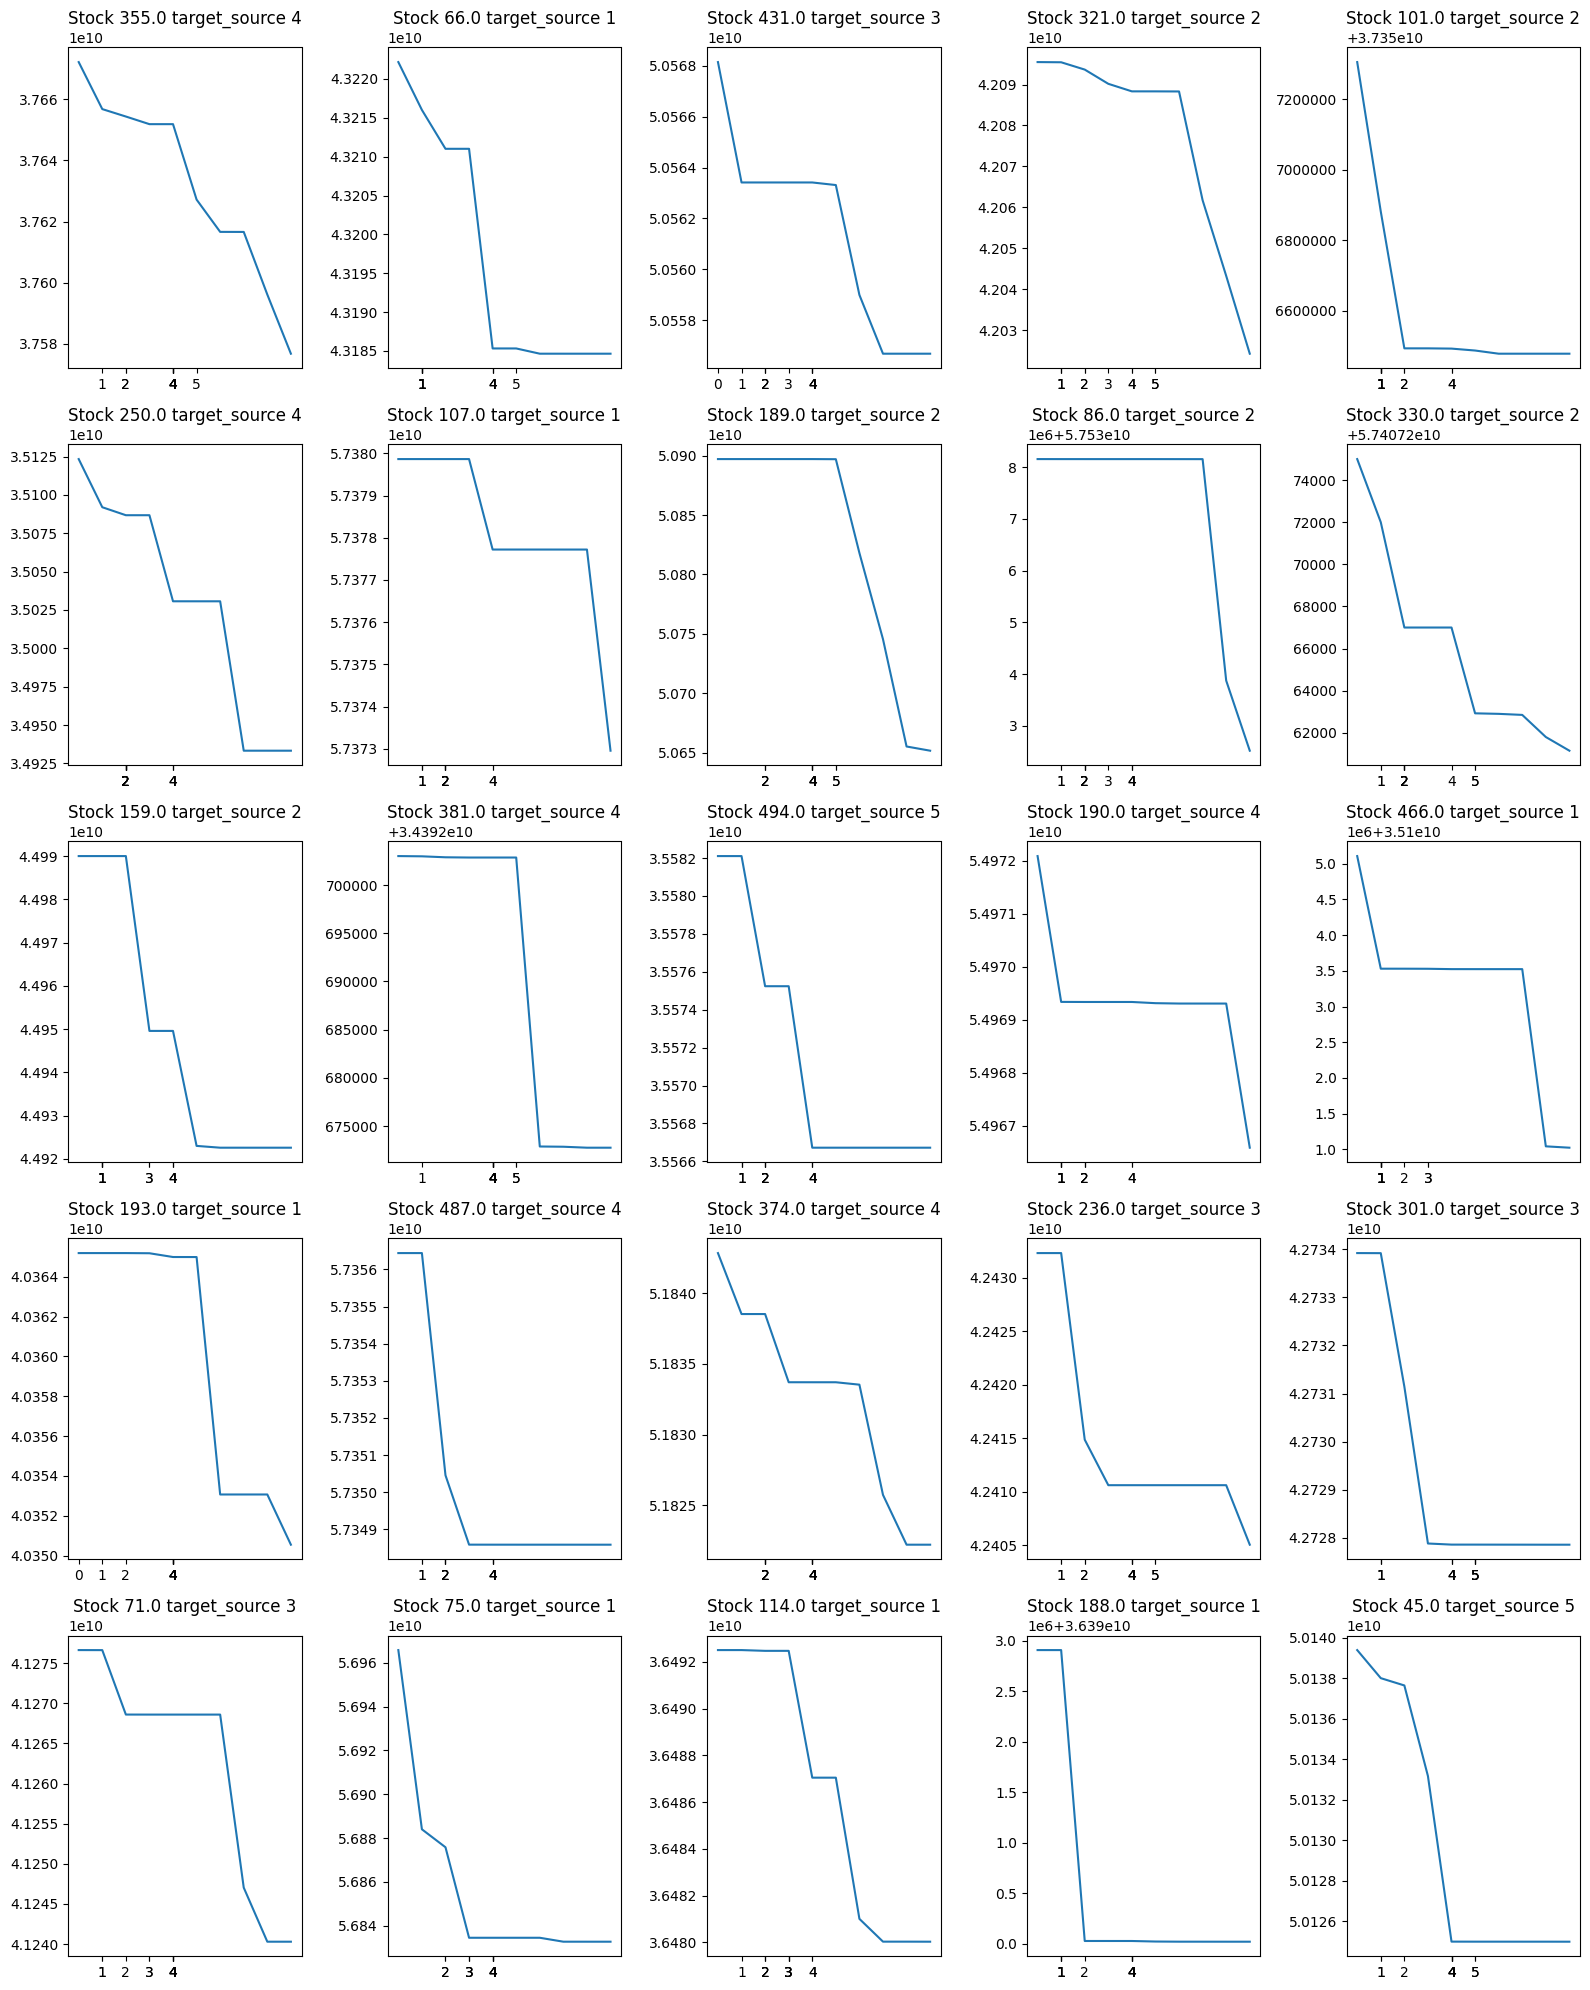

In [12]:
def plot_last_trades_time(data, labels, n_samples = 25):
    np.random.seed(42)
    choice = np.random.randint(0, data.shape[0], n_samples)
    data = data.iloc[choice]
    labels = labels.iloc[choice]

    num_cols = 5
    num_rows = (n_samples // num_cols) + (n_samples % num_cols > 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
    axes = axes.flatten()
    
    for idx, (row_data, row_labels) in enumerate(zip(data.iterrows(), labels.iterrows())):
        row_data = row_data[1]
        row_labels = row_labels[1]
        
        ts_last_update = [row_data[(i, "tod")] for i in range(10)]
        source_id = [row_data[(i, "source_id")] for i in range(10)]
        
        ax = axes[idx]
        ax.plot(ts_last_update, label = "tod")
        ax.set_xticks(source_id)
        ax.set_title(f"Stock {row_data['stock_id']} target_source {row_labels['source_id']}")
        
    plt.tight_layout()
    plt.show()
    
plot_last_trades_time(train_data, labels)
    

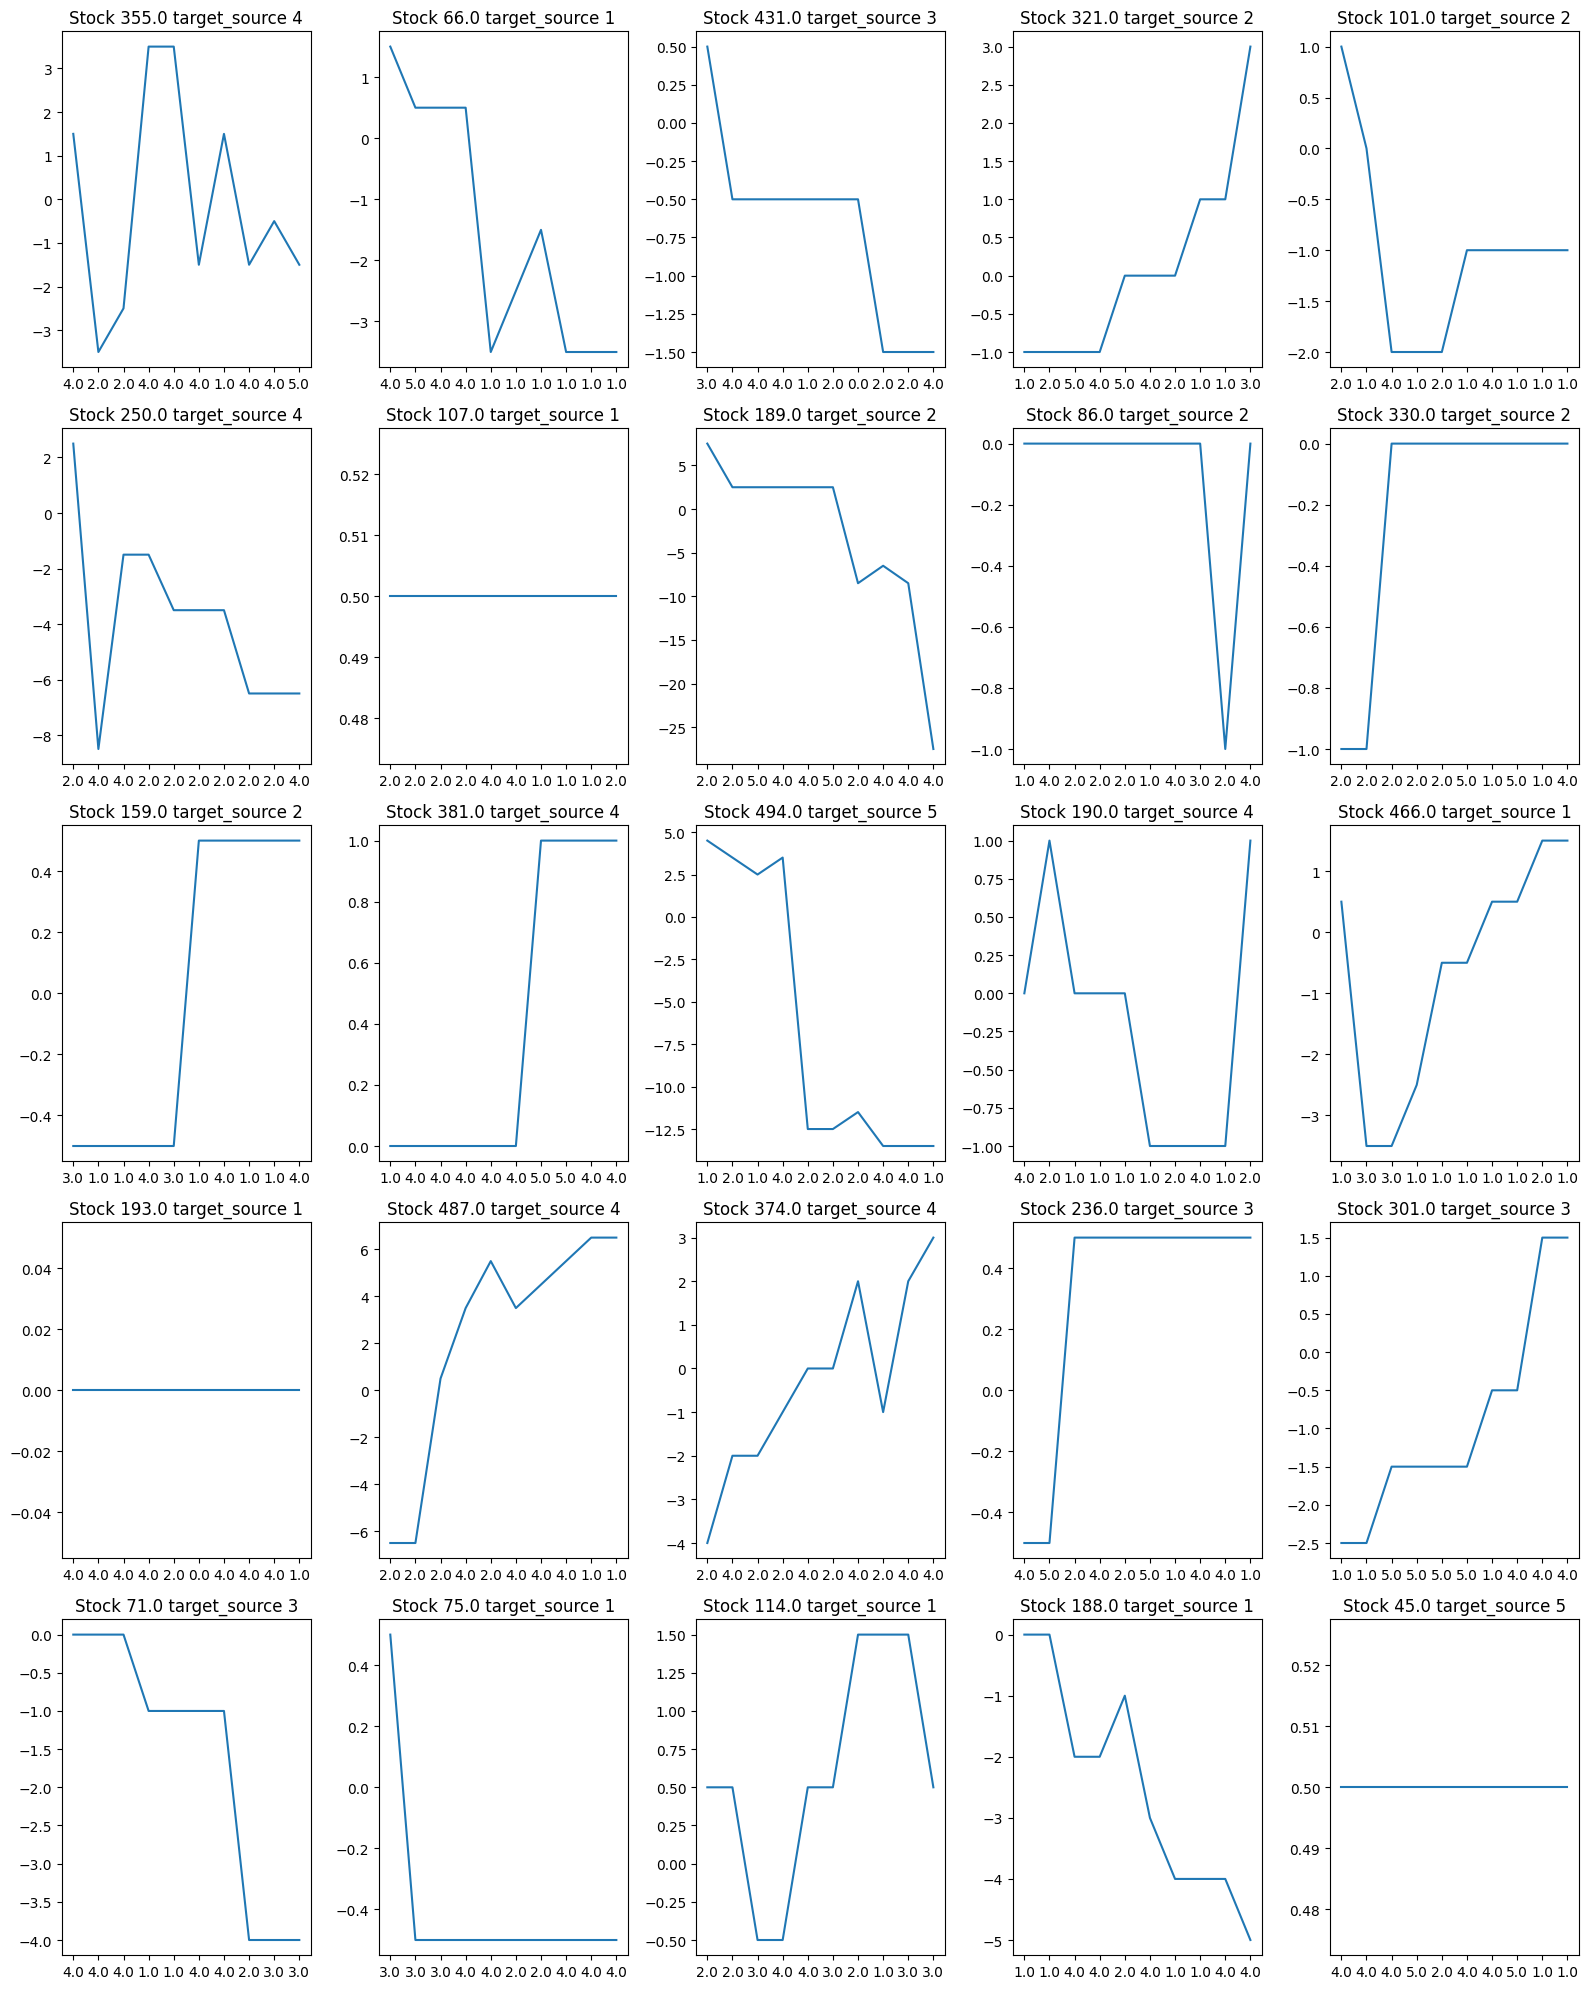

In [16]:
def plot_price_last_trades(data, labels, n_samples = 25):
    np.random.seed(42)
    choice = np.random.randint(0, data.shape[0], n_samples)
    data = data.iloc[choice]
    labels = labels.iloc[choice]

    num_cols = 5
    num_rows = (n_samples // num_cols) + (n_samples % num_cols > 0)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 4))
    axes = axes.flatten()
    
    for idx, (row_data, row_labels) in enumerate(zip(data.iterrows(), labels.iterrows())):
        row_data = row_data[1]
        row_labels = row_labels[1]
        
        price = [row_data[(i, "price")] for i in range(10)]
        source_id = [row_data[(i, "source_id")] for i in range(10)]
        
        ax = axes[idx]
        ax.plot(price)
        ax.set_xticks(np.arange(len(source_id)))
        ax.set_xticklabels(source_id)
        ax.set_title(f"Stock {row_data['stock_id']} target_source {row_labels['source_id']}")
        
    plt.tight_layout()
    plt.show()
    
plot_price_last_trades(train_data, labels)
    

# Data engineering

In [ ]:
# ajouter le spread pour chaque order book
#ajouter une variable dans quel order book est le meilleur spread
print(utils.compute_best_spread(train_data)["spread"])

0         3.5
1         1.5
2         5.0
3         0.5
4         5.0
         ... 
959501    4.0
959502    0.5
959503    0.5
959504    0.5
959505    0.5
Name: spread, Length: 959506, dtype: float32


In [ ]:
# moyenne des ordres passés pour chaque stock
# evolution des prix a ct pour chaque stock
